In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect("../../mywork/yelp.db")
cursor = conn.cursor()

In [3]:
df_checkin = pd.read_sql_query("SELECT * FROM business_checkin LIMIT 10", conn)

# Display first 10 rows
df_checkin.head(10)

,business_id,city,state,postal_code,latitude,longitude,categories,category_list,filtered_categories,date
0,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,19107,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","[""Restaurants"", ""Food"", ""Bubble Tea"", ""Coffee ...","[""Restaurants"", ""Food"", ""Bubble Tea"", ""Coffee ...","2010-08-18 17:05:36, 2010-11-25 17:45:31, 2011..."
1,mWMc6_wTdE0EUBKIGXDVfA,Green Lane,PA,18054,40.338183,-75.471659,"Brewpubs, Breweries, Food","[""Brewpubs"", ""Breweries"", ""Food""]","[""Brewpubs"", ""Breweries"", ""Food""]","2019-06-28 21:35:09, 2019-09-12 21:07:48, 2019..."
2,CF33F8-E6oudUQ46HnavjQ,Ashland City,TN,37015,36.269593,-87.058943,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...","[""Burgers"", ""Fast Food"", ""Sandwiches"", ""Food"",...","[""Burgers"", ""Fast Food"", ""Sandwiches"", ""Food"",...","2012-12-16 05:27:33, 2013-02-15 04:00:46, 2013..."
3,k0hlBqXX-Bt0vf1op7Jr1w,Affton,MO,63123,38.565165,-90.321087,"Pubs, Restaurants, Italian, Bars, American (Tr...","[""Pubs"", ""Restaurants"", ""Italian"", ""Bars"", ""Am...","[""Pubs"", ""Restaurants"", ""Italian"", ""Bars"", ""Am...","2012-04-16 22:28:12, 2012-04-20 22:38:55, 2012..."
4,bBDDEgkFA1Otx9Lfe7BZUQ,Nashville,TN,37207,36.208102,-86.768170,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","[""Ice Cream & Frozen Yogurt"", ""Fast Food"", ""Bu...","[""Ice Cream & Frozen Yogurt"", ""Fast Food"", ""Bu...","2011-01-17 15:31:21, 2011-02-23 21:28:08, 2011..."
5,eEOYSgkmpB90uNA7lDOMRA,Tampa Bay,FL,33602,27.955269,-82.456320,"Vietnamese, Food, Restaurants, Food Trucks","[""Vietnamese"", ""Food"", ""Restaurants"", ""Food Tr...","[""Vietnamese"", ""Food"", ""Restaurants""]","2018-07-19 20:23:33, 2019-07-12 15:37:41, 2019..."
6,il_Ro8jwPlHresjw9EGmBg,Indianapolis,IN,46227,39.637133,-86.127217,"American (Traditional), Restaurants, Diners, B...","[""American (Traditional)"", ""Restaurants"", ""Din...","[""American (Traditional)"", ""Restaurants"", ""Bre...","2010-07-24 13:09:14, 2010-09-05 16:25:35, 2010..."
7,0bPLkL0QhhPO5kt1_EXmNQ,Largo,FL,33771,27.916116,-82.760461,"Food, Delis, Italian, Bakeries, Restaurants","[""Food"", ""Delis"", ""Italian"", ""Bakeries"", ""Rest...","[""Food"", ""Italian"", ""Bakeries"", ""Restaurants""]","2010-08-26 17:52:51, 2011-02-13 00:43:54, 2011..."
8,MUTTqe8uqyMdBl186RmNeA,Philadelphia,PA,19106,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese","[""Sushi Bars"", ""Restaurants"", ""Japanese""]","[""Sushi Bars"", ""Restaurants""]","2017-11-25 02:28:19, 2017-11-28 23:17:19, 2017..."
9,ROeacJQwBeh05Rqg7F6TCg,Philadelphia,PA,19147,39.943223,-75.162568,"Korean, Restaurants","[""Korean"", ""Restaurants""]","[""Korean"", ""Restaurants""]","2013-12-06 22:32:24, 2013-12-18 02:03:03, 2014..."


In [4]:
df_final = df_checkin.drop(columns=["categories", "category_list"])
# df_final = df_checkin.copy()

In [5]:
import ast

def clean_categories(cat_str):
    # Convert string list → actual Python list
    cat_list = ast.literal_eval(cat_str)

    # Remove Restaurants and Food
    cleaned = [c for c in cat_list if c not in ["Restaurants", "Food"]]

    # Convert list back to string
    return str(cleaned)

df_final["filtered_categories"] = df_final["filtered_categories"].apply(clean_categories)


In [6]:
df_final.head(10)

,business_id,city,state,postal_code,latitude,longitude,filtered_categories,date
0,MTSW4McQd7CbVtyjqoe9mw,Philadelphia,PA,19107,39.955505,-75.155564,"['Bubble Tea', 'Coffee & Tea', 'Bakeries']","2010-08-18 17:05:36, 2010-11-25 17:45:31, 2011..."
1,mWMc6_wTdE0EUBKIGXDVfA,Green Lane,PA,18054,40.338183,-75.471659,"['Brewpubs', 'Breweries']","2019-06-28 21:35:09, 2019-09-12 21:07:48, 2019..."
2,CF33F8-E6oudUQ46HnavjQ,Ashland City,TN,37015,36.269593,-87.058943,"['Burgers', 'Fast Food', 'Sandwiches', 'Ice Cr...","2012-12-16 05:27:33, 2013-02-15 04:00:46, 2013..."
3,k0hlBqXX-Bt0vf1op7Jr1w,Affton,MO,63123,38.565165,-90.321087,"['Pubs', 'Italian', 'Bars', 'American (Traditi...","2012-04-16 22:28:12, 2012-04-20 22:38:55, 2012..."
4,bBDDEgkFA1Otx9Lfe7BZUQ,Nashville,TN,37207,36.208102,-86.768170,"['Ice Cream & Frozen Yogurt', 'Fast Food', 'Bu...","2011-01-17 15:31:21, 2011-02-23 21:28:08, 2011..."
5,eEOYSgkmpB90uNA7lDOMRA,Tampa Bay,FL,33602,27.955269,-82.456320,['Vietnamese'],"2018-07-19 20:23:33, 2019-07-12 15:37:41, 2019..."
6,il_Ro8jwPlHresjw9EGmBg,Indianapolis,IN,46227,39.637133,-86.127217,"['American (Traditional)', 'Breakfast & Brunch']","2010-07-24 13:09:14, 2010-09-05 16:25:35, 2010..."
7,0bPLkL0QhhPO5kt1_EXmNQ,Largo,FL,33771,27.916116,-82.760461,"['Italian', 'Bakeries']","2010-08-26 17:52:51, 2011-02-13 00:43:54, 2011..."
8,MUTTqe8uqyMdBl186RmNeA,Philadelphia,PA,19106,39.953949,-75.143226,['Sushi Bars'],"2017-11-25 02:28:19, 2017-11-28 23:17:19, 2017..."
9,ROeacJQwBeh05Rqg7F6TCg,Philadelphia,PA,19147,39.943223,-75.162568,['Korean'],"2013-12-06 22:32:24, 2013-12-18 02:03:03, 2014..."


In [7]:
df_final.columns

Index(['business_id', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'filtered_categories', 'date'],
      dtype='object')

In [8]:
import ast

df_final["filtered_categories"] = df_final["filtered_categories"].apply(ast.literal_eval)


In [9]:
df_exploded = df_final.explode("filtered_categories")
df_exploded = df_exploded.rename(columns={"filtered_categories": "category"})


In [10]:
mapping_dict = df_exploded.groupby("business_id")["category"].apply(list).to_dict()

import json

with open("business_category_mapping.json", "w") as f:
    json.dump(mapping_dict, f, indent=4)


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          10 non-null     object 
 1   city                 10 non-null     object 
 2   state                10 non-null     object 
 3   postal_code          10 non-null     object 
 4   latitude             10 non-null     float64
 5   longitude            10 non-null     float64
 6   filtered_categories  10 non-null     object 
 7   date                 10 non-null     object 
dtypes: float64(2), object(6)
memory usage: 772.0+ bytes


In [12]:
def convert_to_dates(date_str):
    if pd.isna(date_str):
        return []                      # safe for rows with no dates
    
    # split by comma
    parts = [d.strip() for d in date_str.split(',')]
    
    # convert to datetime, forcing errors to NaT
    return pd.to_datetime(parts, errors='coerce')


In [13]:
df_final['date'][0]

'2010-08-18 17:05:36, 2010-11-25 17:45:31, 2011-02-27 16:58:20, 2011-05-07 14:53:45, 2011-07-23 14:42:36, 2011-09-10 00:47:25, 2011-09-10 22:48:43, 2011-11-24 15:08:04, 2011-12-04 17:12:11, 2011-12-11 17:42:30, 2012-01-07 01:55:08, 2012-01-27 17:25:35, 2012-02-02 23:27:25, 2012-02-08 02:42:30, 2012-02-12 02:12:58, 2012-02-19 20:00:18, 2012-03-01 21:38:08, 2012-03-03 01:36:16, 2012-03-04 19:02:10, 2012-03-11 21:45:52, 2012-03-27 22:43:44, 2012-03-31 22:49:05, 2012-04-17 22:28:54, 2012-04-21 21:23:45, 2012-06-17 21:59:17, 2012-07-07 21:11:44, 2012-07-10 20:41:38, 2012-07-13 00:16:29, 2012-07-15 16:47:10, 2012-07-19 18:19:28, 2012-07-22 20:14:42, 2012-07-29 15:35:48, 2012-08-15 18:05:50, 2012-08-23 23:39:12, 2012-08-29 11:11:15, 2012-09-08 14:56:13, 2012-09-16 15:30:07, 2012-09-17 21:54:50, 2012-09-24 22:33:28, 2012-09-30 14:53:46, 2012-10-21 16:39:00, 2012-10-30 18:29:23, 2012-11-23 15:03:33, 2012-11-24 20:13:37, 2012-11-24 21:00:00, 2012-11-27 20:15:25, 2012-11-30 19:19:22, 2012-12-16 2

In [14]:
import re
# --- 1. Fill missing dates ---
df_final['date'] = df_final['date'].fillna("")

# --- 2. Define the years to keep ---
keep_years = [2020, 2021, 2022]

# --- 3. Filter date string to keep only timestamps from chosen years ---
def filter_dates(date_str, years):
    if not date_str:
        return ""
    parts = [d.strip() for d in date_str.split(",")]
    filtered = [d for d in parts if any(str(y) in d for y in years)]
    return ", ".join(filtered)

df_final["filtered_date"] = df_final["date"].apply(lambda x: filter_dates(x, keep_years))

# --- 4. Extract ONLY the years from filtered_date ---
def extract_filtered_years(date_str):
    if not date_str:
        return []
    years = re.findall(r"\b(20\d{2}|21\d{2}|22\d{2})\b", date_str)
    years = list(map(int, years))
    return [y for y in years if y in keep_years]

df_final["years_list"] = df_final["filtered_date"].apply(extract_filtered_years)


In [15]:
# drop null dates in filtered_date
# drop null dates in filtered_date
# df_final = df_final[df_final["years_list"].map(len) > 0]
# df_final.shape
df_final = df_final[df_final["filtered_date"] != ""]
df_final.shape

(7, 10)

In [16]:
# Split filtered_date into individual dates
df_exploded = df_final[['business_id', 'filtered_date']].copy()
df_exploded['date'] = df_exploded['filtered_date'].str.split(', ')

# Explode so each date gets its own row
df_exploded = df_exploded.explode('date')

# Convert to datetime
df_exploded['date'] = pd.to_datetime(df_exploded['date'], errors='coerce')

# Drop rows where date is NaT (in case of empty strings)
df_exploded = df_exploded.dropna(subset=['date'])


In [17]:
df_exploded['year'] = df_exploded['date'].dt.year


In [18]:
df_grouped = df_exploded.groupby(['business_id', 'year'])['date'].apply(lambda x: ', '.join(x.dt.strftime('%Y-%m-%d'))).reset_index()


In [19]:
df_wide = df_grouped.pivot(index='business_id', columns='year', values='date').reset_index()
df_wide.columns.name = None  # remove hierarchy from columns


In [20]:
# Export to JSON, orient='records' will give a list of dictionaries
df_wide.to_json('business_dates_by_year.json', orient='records', date_format='iso')


In [22]:
import json
import sqlite3
import pandas as pd

# -------- Step 1: Load JSON file --------
with open("business_dates_by_year.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# -------- Step 2: Convert to DataFrame --------
df = pd.DataFrame(data)

# -------- Step 3: Connect to SQLite --------
conn = sqlite3.connect("../../mywork/yelp.db")

# -------- Step 4: Save to DB --------
# df.to_sql("business_dates_by_year", conn, if_exists="replace", index=False)

# -------- Step 5: Verify --------
print(pd.read_sql_query("SELECT COUNT(*) FROM business_dates_by_year", conn))
print(pd.read_sql_query("SELECT * FROM business_dates_by_year", conn))


   COUNT(*)
0     40351
                  business_id  \
0      ---kPU91CF4Lq2-WlRu9Lw   
1      --epgcb7xHGuJ-4PUeSLAw   
2      --hF_3v1JmU9nlu4zfXJ8Q   
3      --lqIzK-ZVTtgwiQM63XgQ   
4      --rS-rnOIZxoiDA8yctWpQ   
...                       ...   
40346  zzbZtgPYZS8sTIWQH6DwEw   
40347  zziDpuuJw-Km1J4BaGpBKA   
40348  zzjFdJwXuxBOGe9JeY_EMw   
40349  zznJox6-nmXlGYNWgTDwQQ   
40350  zznZqH9CiAznbkV6fXyHWA   

                                                    2020  \
0      2020-03-13, 2020-06-02, 2020-07-24, 2020-10-24...   
1         2020-02-09, 2020-05-31, 2020-10-12, 2020-11-07   
2                                                   None   
3                     2020-04-30, 2020-07-13, 2020-10-13   
4                                                   None   
...                                                  ...   
40346     2020-06-18, 2020-08-06, 2020-09-17, 2020-11-28   
40347                             2020-01-30, 2020-12-21   
40348                             2020-

In [23]:
pd.read_sql_query("SELECT * FROM business_dates_by_year LIMIT 1", conn)

,business_id,2020,2021,2022
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13, 2020-06-02, 2020-07-24, 2020-10-24...","2021-01-20, 2021-04-30, 2021-05-25, 2021-08-06...",None


In [25]:


# ---------- STEP 1: Read file safely (fix NaN) ----------
with open("business_category_mapping.json", "r", encoding="utf-8") as f:
    raw = f.read().replace("NaN", "null")

data = json.loads(raw)

# ---------- STEP 2: Normalize into rows ----------
def normalize_json(data):
    # Case 1: If it is already a list of dicts → return as DataFrame
    if isinstance(data, list) and all(isinstance(x, dict) for x in data):
        return pd.json_normalize(data)

    # Case 2: If it is a dict → convert to rows
    if isinstance(data, dict):
        rows = []
        for k, v in data.items():
            rows.append({
                "key": k,
                "value": json.dumps(v)  # store nested lists/dicts as TEXT
            })
        return pd.DataFrame(rows)

    # Otherwise convert everything to a single-column table
    return pd.DataFrame({"value": [json.dumps(data)]})

df = normalize_json(data)

# ---------- STEP 3: Clean missing values ----------
df = df.fillna("")  # replace NaN with empty string

# ---------- STEP 4: Save to SQLite ----------
conn = sqlite3.connect("../../mywork/yelp.db")
df.to_sql("business_category_mapping", conn, if_exists="replace", index=False)

# ---------- STEP 5: Verify ----------
print(pd.read_sql_query("SELECT COUNT(*) FROM business_category_mapping", conn))
print(pd.read_sql_query("SELECT * FROM business_category_mapping LIMIT 5", conn))


   COUNT(*)
0        10
                      key                                              value
0  0bPLkL0QhhPO5kt1_EXmNQ                            ["Italian", "Bakeries"]
1  CF33F8-E6oudUQ46HnavjQ  ["Burgers", "Fast Food", "Sandwiches", "Ice Cr...
2  MTSW4McQd7CbVtyjqoe9mw         ["Bubble Tea", "Coffee & Tea", "Bakeries"]
3  MUTTqe8uqyMdBl186RmNeA                                     ["Sushi Bars"]
4  ROeacJQwBeh05Rqg7F6TCg                                         ["Korean"]


In [26]:
# List all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

tables = cursor.fetchall()

print("Tables in database:")
for t in tables:
    print(t[0])

Tables in database:
checkin_businesses
businesses
business_checkin
reviews
tips
users
weather_data
business_dates_by_year
weather_data_2020_2022
business_category_expanded
business_category_mapping


In [27]:
import pandas as pd 
import numpy as np 
import json 
from datetime import datetime
from meteostat import Point, Daily 

START_DATE = datetime(2020, 1, 1)
END_DATE = datetime(2022, 12, 31)


LATITUDE = 39.8764  
LONGITUDE = -75.2437 

JSON_FILE_PATH = 'weather_data_2020_2022.json'

# =======================================================
# STEP 1: FETCH DATA FROM METEOSTAT
# =======================================================

print("--- Step 1: Fetching 2020-2022 Weather Data ---")

try:
    # Set the location
    location = Point(LATITUDE, LONGITUDE)

    # Fetch daily weather data
    weather_data_fetch = Daily(location, START_DATE, END_DATE)
    df_weather_new = weather_data_fetch.fetch()

    if df_weather_new.empty:
        print("Error: Fetched zero rows. Check coordinates or date range.")
    else:
        # Prepare the DataFrame for storage
        df_weather_new = df_weather_new.reset_index()
        df_weather_new = df_weather_new.rename(columns={'time': 'date'})
        print(f"Successfully fetched {len(df_weather_new)} rows.")
        print("Columns fetched:", df_weather_new.columns.tolist())

        # =======================================================
        # STEP 2: STORE DATA INTO JSON FILE (FOR FASTER ACCESS)
        # =======================================================
        
        # Save the DataFrame to a JSON file using the 'records' orientation
        # This approach avoids the 'database is locked' issue.
        # df_weather_new.to_json(JSON_FILE_PATH, orient='records', date_format='iso')
        
        print(f"\n--- Step 2: Data stored successfully to {JSON_FILE_PATH} ---")

except Exception as e:
    print(f"An error occurred during data fetching or saving: {e}")


# =======================================================
# STEP 3: ACCESS DATA FOR EDA
# =======================================================

print("\n--- Step 3: Accessing Weather Data for EDA ---")

try:
    # Read the data back from the JSON file into a new DataFrame
    df_weather_eda = pd.read_json(JSON_FILE_PATH)

    # Convert the date column back to datetime objects, essential for merging
    df_weather_eda['date'] = pd.to_datetime(df_weather_eda['date'])

    print(f"Successfully loaded {len(df_weather_eda)} rows for EDA.")
    print("DataFrame structure:")
    print(df_weather_eda.info())
    print("\nFirst 5 rows of Weather Data for EDA:")
    print(df_weather_eda.head())

except FileNotFoundError:
    print(f"Error: JSON file not found at {JSON_FILE_PATH}. Check steps 1 and 2.")
except Exception as e:
    print(f"An error occurred during loading the JSON file: {e}")

# Example of EDA insight: Distribution of average temperature (tavg)
if 'df_weather_eda' in locals() and not df_weather_eda.empty:
    import matplotlib.pyplot as plt # [3]
    import seaborn as sns 
    
    plt.figure(figsize=(7, 4))
    sns.histplot(df_weather_eda['tavg'], bins=30, kde=True)
    plt.title("Distribution of Average Daily Temperature (2020-2022)")
    plt.xlabel("Average Temperature (°C)")
    plt.ylabel("Frequency")
    plt.show()


# =======================================================
# STEP 4: CREATE SQLITE DATABASE AND EXPORT DATA
# =======================================================

import sqlite3

DB_PATH = "weather.db"
TABLE_NAME = "weather_daily"

print("\n--- Step 4: Creating SQLite database ---")

try:
    # Connect to SQLite file (creates file if not exists)
    conn = sqlite3.connect(DB_PATH)

    # Export your EDA DataFrame to the SQLite database
    df_weather_eda.to_sql(TABLE_NAME, conn, if_exists='replace', index=False)

    conn.close()

    print(f"Database '{DB_PATH}' created successfully.")
    print(f"Table '{TABLE_NAME}' saved with {len(df_weather_eda)} rows.")

except Exception as e:
    print("Error creating SQLite database:", e)

--- Step 1: Fetching 2020-2022 Weather Data ---
Successfully fetched 1096 rows.
Columns fetched: ['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']

--- Step 2: Data stored successfully to weather_data_2020_2022.json ---

--- Step 3: Accessing Weather Data for EDA ---
Error: JSON file not found at weather_data_2020_2022.json. Check steps 1 and 2.

--- Step 4: Creating SQLite database ---
Error creating SQLite database: name 'df_weather_eda' is not defined


In [29]:
# ---------- STEP 1: Read file safely (fix NaN) ----------
with open("weather_data_2020_2022.json", "r", encoding="utf-8") as f:
    raw = f.read().replace("NaN", "null")

data = json.loads(raw)

# ---------- STEP 2: Normalize into rows ----------
def normalize_json(data):
    # Case 1: If it is already a list of dicts → return as DataFrame
    if isinstance(data, list) and all(isinstance(x, dict) for x in data):
        return pd.json_normalize(data)

    # Case 2: If it is a dict → convert to rows
    if isinstance(data, dict):
        rows = []
        for k, v in data.items():
            rows.append({
                "key": k,
                "value": json.dumps(v)  # store nested lists/dicts as TEXT
            })
        return pd.DataFrame(rows)

    # Otherwise convert everything to a single-column table
    return pd.DataFrame({"value": [json.dumps(data)]})

df = normalize_json(data)

# ---------- STEP 3: Clean missing values ----------
df = df.fillna("")  # replace NaN with empty string

# ---------- STEP 4: Save to SQLite ----------
conn = sqlite3.connect("../../mywork/yelp.db")
df.to_sql("weather_data_2020_2022", conn, if_exists="replace", index=False)

# ---------- STEP 5: Verify ----------
print(pd.read_sql_query("SELECT COUNT(*) FROM weather_data_2020_2022", conn))
print(pd.read_sql_query("SELECT * FROM weather_data_2020_2022 LIMIT 5", conn))


   COUNT(*)
0      1096
                      date  tavg  tmin  tmax  prcp  snow wdir  wspd wpgt  \
0  2020-01-01T00:00:00.000   4.8  -1.6   5.6   0.0   0.0       14.8        
1  2020-01-02T00:00:00.000   2.4  -2.7   8.3   0.0   0.0        6.5        
2  2020-01-03T00:00:00.000   7.6   6.1   9.4   5.3   0.0        7.2        
3  2020-01-04T00:00:00.000   9.5   5.6  12.2   3.8   0.0       11.5        
4  2020-01-05T00:00:00.000   5.2   1.7   5.6   0.0   0.0       26.3        

     pres tsun  
0  1009.9       
1  1014.2       
2  1010.3       
3  1004.0       
4  1012.8       


In [30]:
# Load mapping table
cat_df = pd.read_sql("""
SELECT *
FROM business_category_mapping
""", conn)

# Load check-in business table
chk_df = pd.read_sql("""
SELECT * 
FROM checkin_businesses
""", conn)

# Load only business_id and city
biz_df = pd.read_sql("""
SELECT * 
FROM businesses
""", conn)

In [31]:
# Your string is NOT in a valid list format to convert this into a list directly.
import ast
import json

def safe_to_list(x):
    if x is None:
        return []
    
    # If it's already a list
    if isinstance(x, list):
        return x
    
    # Convert to string
    x = str(x).strip()
    
    # Case 1: Looks like a proper list → try JSON
    if x.startswith("[") and x.endswith("]"):
        try:
            return json.loads(x.replace("'", '"'))
        except:
            try:
                return ast.literal_eval(x)
            except:
                pass
    
    # Case 2: Single category (no list format)
    if "," not in x:
        return [x]
    
    # Case 3: Comma-separated string
    return [cat.strip() for cat in x.split(",")]


In [33]:
cat_df.head()

,key,value
0,0bPLkL0QhhPO5kt1_EXmNQ,"[""Italian"", ""Bakeries""]"
1,CF33F8-E6oudUQ46HnavjQ,"[""Burgers"", ""Fast Food"", ""Sandwiches"", ""Ice Cr..."
2,MTSW4McQd7CbVtyjqoe9mw,"[""Bubble Tea"", ""Coffee & Tea"", ""Bakeries""]"
3,MUTTqe8uqyMdBl186RmNeA,"[""Sushi Bars""]"
4,ROeacJQwBeh05Rqg7F6TCg,"[""Korean""]"


In [35]:
cat_df["value"] = cat_df["value"].apply(safe_to_list)

# Expand list into rows
cat_df = cat_df.explode("value")

In [ ]:
# uploading corrected version to db 
# cat_df.to_sql("business_category_mapping", conn, if_exists="replace", index=False)

In [ ]:
# replce categories convert datatype into my db for further use
cat_df.to_sql("business_category_expanded", conn, if_exists="replace", index=False)

124706

### Cities distribution

In [ ]:
merged = chk_df.merge(cat_df, on="business_id", how="inner")

KeyError: 'key'

In [ ]:
category_counts = merged["categories"].value_counts()

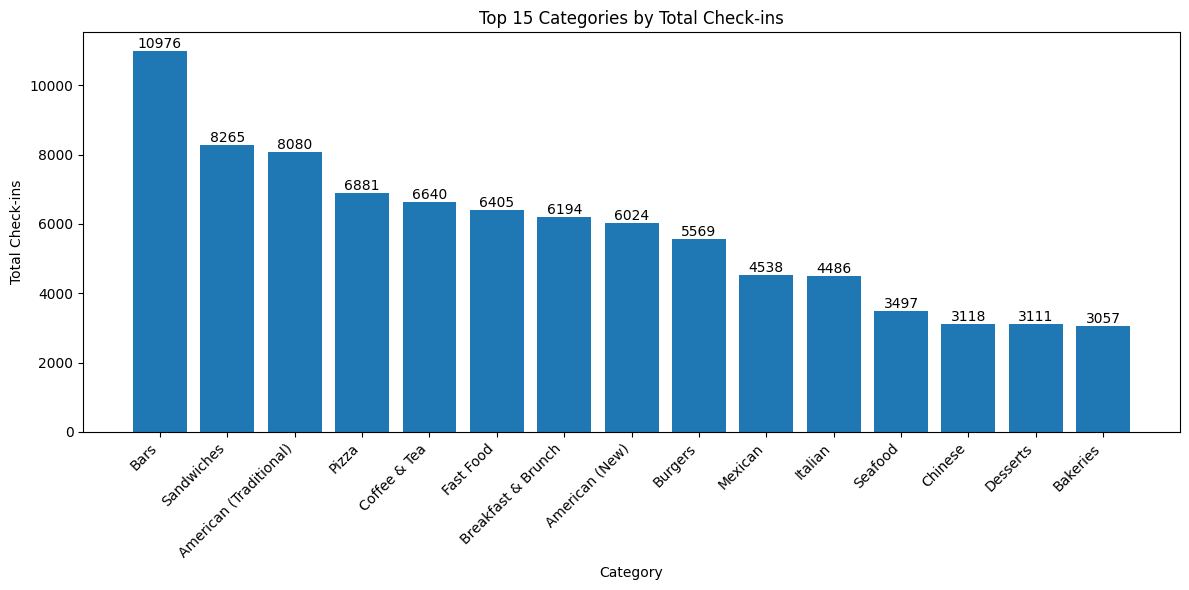

In [ ]:
# Get top 15 categories
top15 = category_counts.head(15)

plt.figure(figsize=(12,6))
bars = plt.bar(top15.index, top15.values)

plt.title("Top 15 Categories by Total Check-ins")
plt.ylabel("Total Check-ins")
plt.xlabel("Category")
plt.xticks(rotation=45, ha="right")

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(height),
        ha='center', 
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [ ]:
chk_df = pd.read_sql("SELECT * FROM checkin_businesses", conn)

merged_city = chk_df.merge(biz_df, on="business_id", how="inner")

In [ ]:
city_counts = merged_city["city"].value_counts()

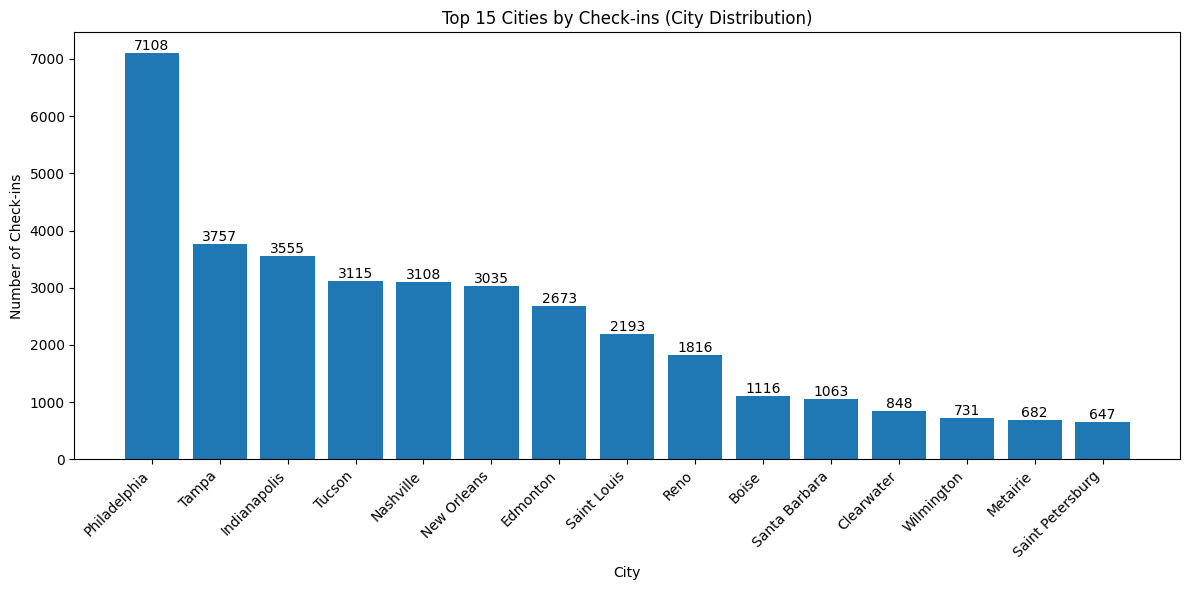

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(city_counts.head(15).index, city_counts.head(15).values)

plt.title("Top 15 Cities by Check-ins (City Distribution)")
plt.ylabel("Number of Check-ins")
plt.xlabel("City")
plt.xticks(rotation=45, ha="right")

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(height),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [ ]:

# checkin_df is already cleaned and exploded
state_checkins = chk_df.merge(biz_df, on="business_id", how="left")


In [ ]:
state_checkins = state_checkins.dropna(subset=["state"])

In [ ]:
state_counts = state_checkins["state"].value_counts()
state_counts.head()


state
PA    15393
FL    11113
TN     5339
IN     5205
MO     5185
Name: count, dtype: int64

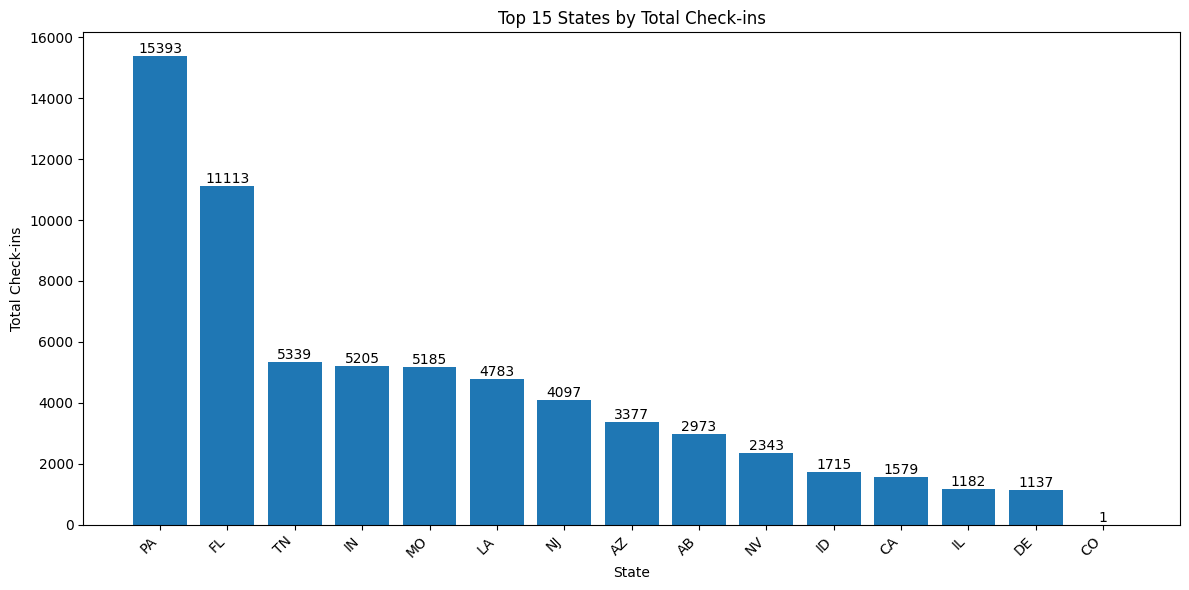

In [ ]:
plt.figure(figsize=(12,6))
bars = plt.bar(state_counts.index[:15], state_counts.values[:15])

plt.title("Top 15 States by Total Check-ins")
plt.xlabel("State")
plt.ylabel("Total Check-ins")
plt.xticks(rotation=45, ha="right")

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        str(height),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [ ]:
weather_df = pd.read_sql("""
SELECT date, tavg, tmin, tmax, prcp, snow, wspd, pres 
FROM weather_data_2020_2022
""", conn)

In [ ]:
weather_df['date'] = pd.to_datetime(weather_df['date'])


In [ ]:
num_df = weather_df.select_dtypes(include=['float64', 'int64'])


In [ ]:
corr = num_df.corr()


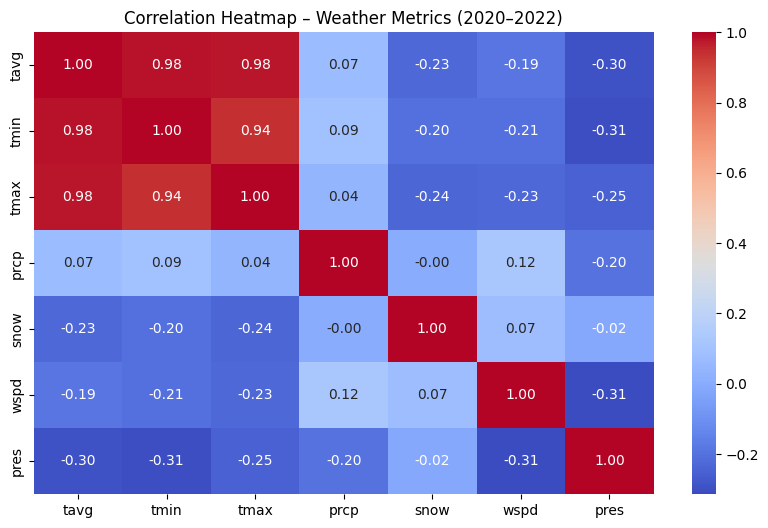

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap – Weather Metrics (2020–2022)")
plt.show()


In [ ]:
tips_df = pd.read_sql("SELECT * FROM tips", conn)
# reviews_df = pd.read_sql("SELECT * FROM reviews", conn)

tips_df.head()
# reviews_df.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
# Convert 'date' to datetime
tips_df['date'] = pd.to_datetime(tips_df['date'], errors='coerce')

# Drop rows with invalid date
tips_df = tips_df.dropna(subset=['date'])

# Add tip length column (number of characters)
tips_df['tip_length'] = tips_df['text'].str.len()

tips_df.head()

,user_id,business_id,text,date,compliment_count,tip_length
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0,30
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0,57
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0,38
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0,25
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0,38


### Tips per Business

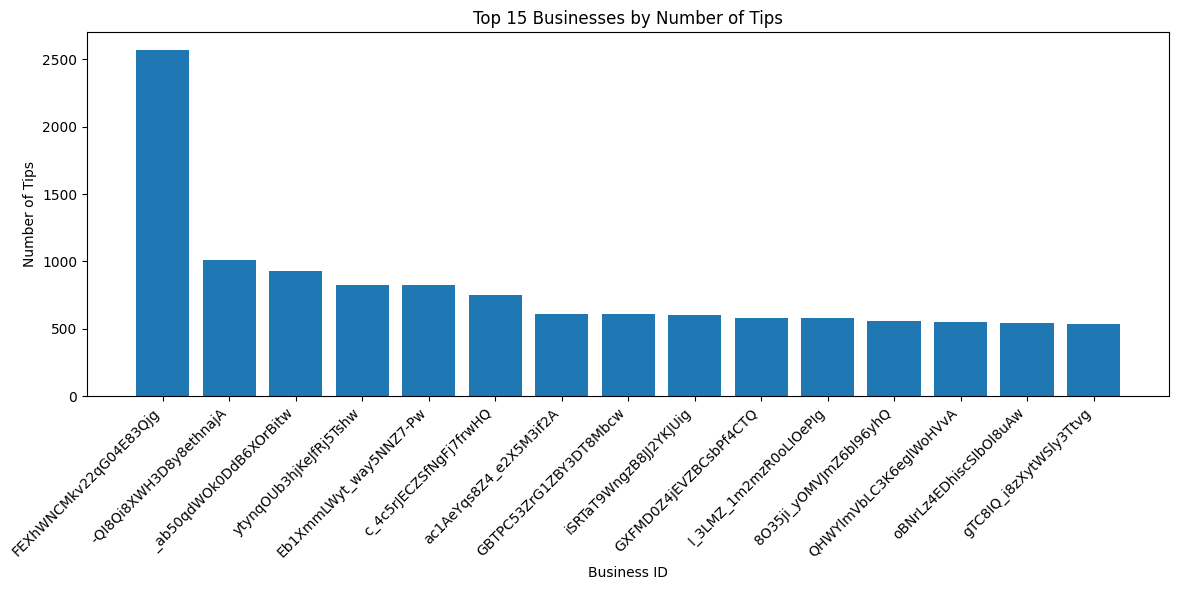

In [ ]:
tips_per_business = tips_df['business_id'].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
bars = plt.bar(tips_per_business.index[:15], tips_per_business.values[:15])
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Businesses by Number of Tips")
plt.ylabel("Number of Tips")
plt.xlabel("Business ID")
plt.tight_layout()
plt.show()


### Tip Length Distribution

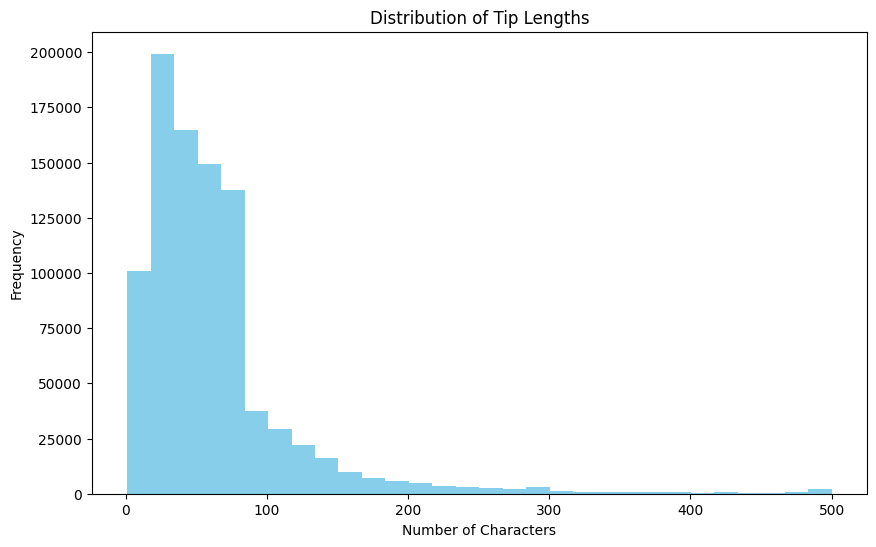

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(tips_df['tip_length'], bins=30, color='skyblue')
plt.title("Distribution of Tip Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


### Tips over Time

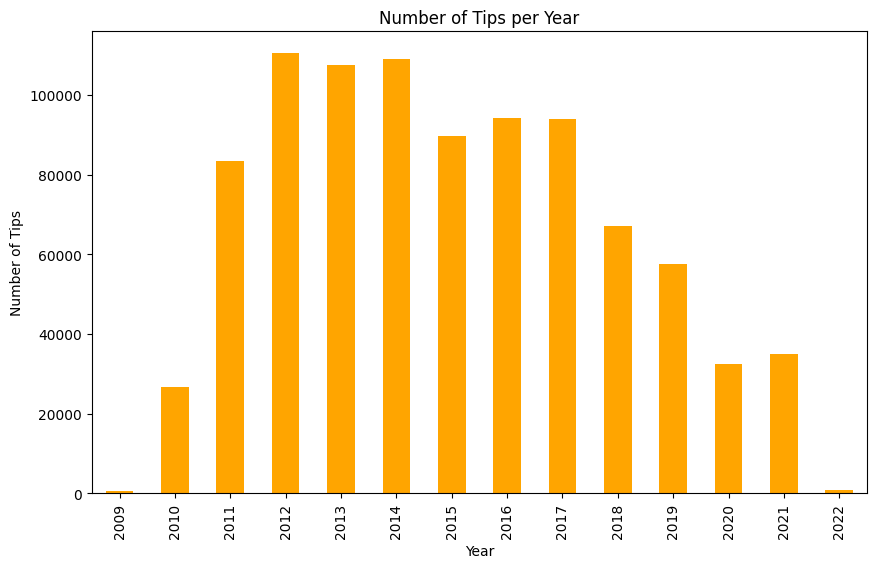

In [ ]:
tips_per_year = tips_df.groupby(tips_df['date'].dt.year).size()
plt.figure(figsize=(10,6))
tips_per_year.plot(kind='bar', color='orange')
plt.title("Number of Tips per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tips")
plt.show()

In [ ]:
# First, ensure all are strings
cat_df['categories'] = cat_df['categories'].astype(str)

# Remove brackets and quotes, then split by comma
def parse_categories(x):
    # Remove leading/trailing brackets
    x = x.strip("[]")
    # Remove quotes
    x = x.replace("'", "").replace('"', '')
    # Split by comma and strip whitespace
    if x:
        return [c.strip() for c in x.split(",")]
    else:
        return []

cat_df['categories'] = cat_df['categories'].apply(parse_categories)

# Explode into multiple rows
cat_exploded = cat_df.explode('categories')


In [ ]:
cat_exploded = cat_exploded.dropna(subset=['categories'])


In [ ]:
tips_merged = tips_df.merge(cat_exploded, on='business_id', how='inner')

# Count tips per category
tips_per_category = tips_merged['categories'].value_counts()

# Top 15 categories
tips_per_category.head(15)


categories
Bars                      196282
American (Traditional)    139445
American (New)            125994
Breakfast & Brunch        112632
Sandwiches                 99215
Coffee & Tea               74872
Seafood                    72359
Burgers                    64359
Pizza                      64304
Mexican                    61311
nan                        58131
Italian                    53174
Cafes                      42943
Salad                      42804
Desserts                   40590
Name: count, dtype: int64

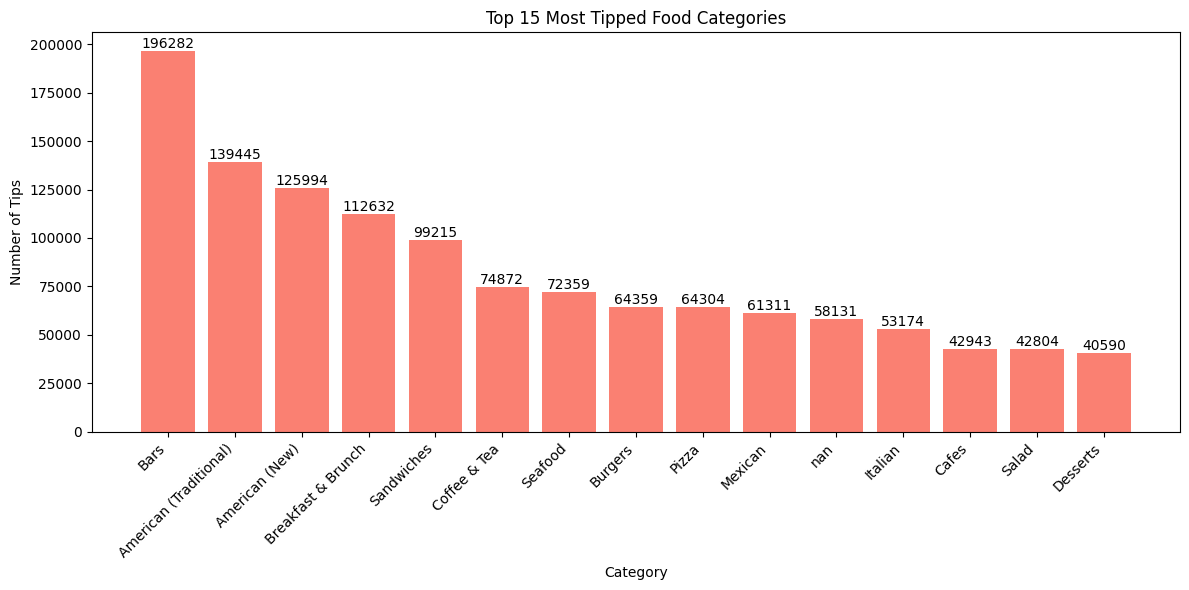

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bars = plt.bar(tips_per_category.index[:15], tips_per_category.values[:15], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Most Tipped Food Categories")
plt.xlabel("Category")
plt.ylabel("Number of Tips")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Calling for Tips

In [ ]:
tip_df = pd.read_sql("""
SELECT * FROM tips
""", conn)
tip_df.head()


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [ ]:
tip_df["text_len"] = tip_df["text"].str.len()

tip_df["text_len"].describe()

count    908915.000000
mean         62.580226
std          57.828705
min           1.000000
25%          28.000000
50%          49.000000
75%          76.000000
max         500.000000
Name: text_len, dtype: float64

In [ ]:
df_tips_per_business = tip_df.groupby('business_id').size().reset_index(name='num_tips')
df_tips_per_business.head()

,business_id,num_tips
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4


In [ ]:
df_business = pd.read_sql_query("""
    SELECT b.business_id, b.city, b.state, bce.categories
    FROM businesses b join business_category_expanded bce
    ON b.business_id = bce.business_id
""", conn)

df_tips_merge = df_tips_per_business.merge(df_business, on='business_id', how='left')
df_tips_merge.head()

# drop nan from categories
df_tips_merge['categories'] = df_tips_merge['categories'].dropna()
# drop None cattegory
df_tips_merge = df_tips_merge[df_tips_merge['categories'] != 'None']

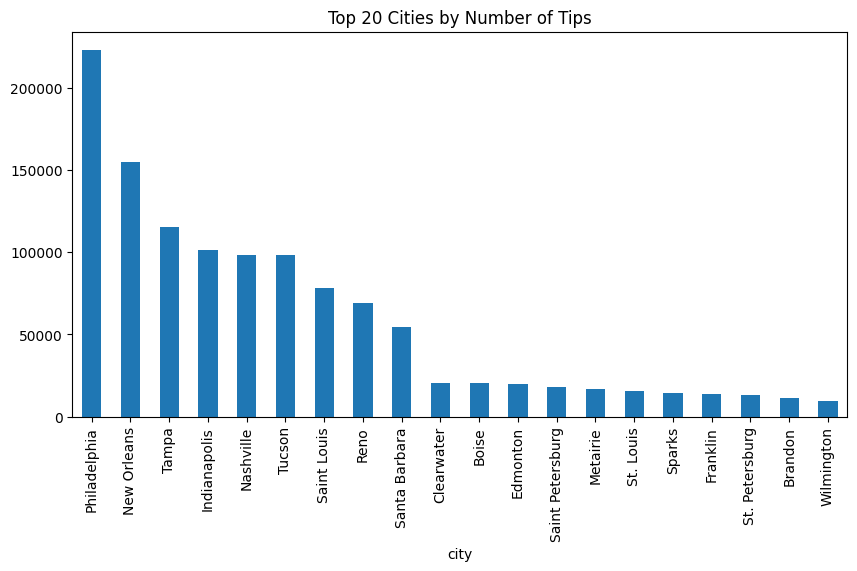

In [ ]:
df_tips_merge.groupby("city")['num_tips'].sum().sort_values(ascending=False).head(20).plot(
    kind="bar", figsize=(10,5)
)
plt.title("Top 20 Cities by Number of Tips")
plt.show()

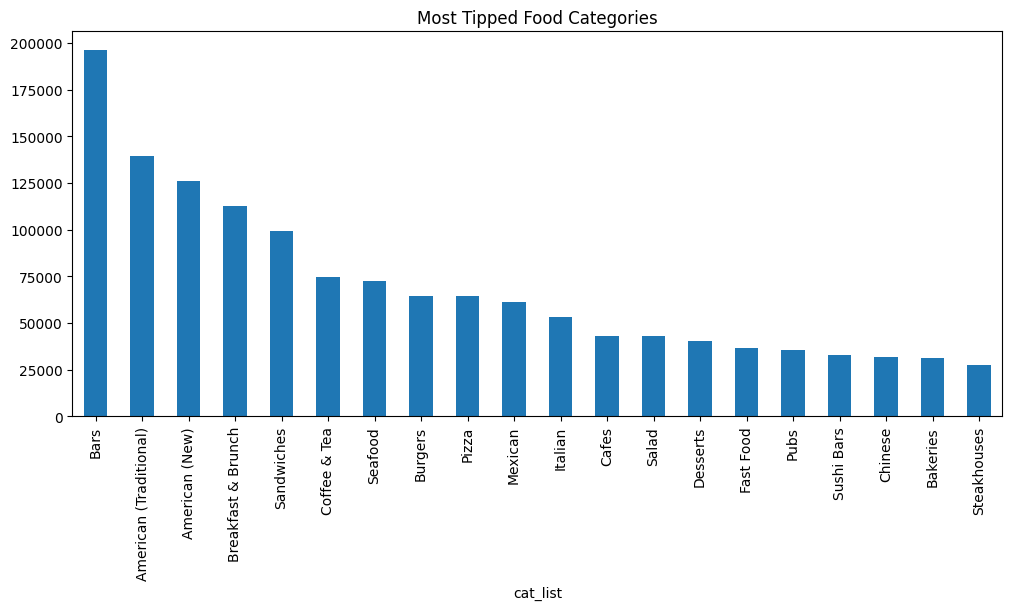

In [ ]:
df_tips_merge['cat_list'] = df_tips_merge['categories'].apply(
    lambda x: x.split(",") if isinstance(x, str) else []
)

df_exploded = df_tips_merge.explode("cat_list")

(
    df_exploded.groupby("cat_list")['num_tips'].sum()
    .sort_values(ascending=False)
    .head(20)
    .plot(kind='bar', figsize=(12,5))
)
plt.title("Most Tipped Food Categories")
plt.show()